In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Set random seed for reproducibility
np.random.seed(42)


In [3]:
# Generate synthetic dataset
n_samples = 1000
data = {
    'square_feet': np.random.normal(2000, 500, n_samples),
    'bedrooms': np.random.randint(1, 6, n_samples),
    'bathrooms': np.random.randint(1, 4, n_samples),
    'age': np.random.randint(0, 50, n_samples),
    'lot_size': np.random.normal(5000, 1000, n_samples),
    'price': np.zeros(n_samples)
}


In [4]:
# Create synthetic house prices
for i in range(n_samples):
    data['price'][i] = (
        data['square_feet'][i] * 150 +
        data['bedrooms'][i] * 20000 +
        data['bathrooms'][i] * 30000 -
        data['age'][i] * 1000 +
        data['lot_size'][i] * 10 +
        np.random.normal(0, 10000)
    )


In [5]:
df = pd.DataFrame(data)


In [6]:
# Data Preprocessing
# Check for missing values
print("Missing values:\n", df.isnull().sum())



Missing values:
 square_feet    0
bedrooms       0
bathrooms      0
age            0
lot_size       0
price          0
dtype: int64


In [7]:
# Feature Engineering
df['price_per_sqft'] = df['price'] / df['square_feet']
df['bed_bath_ratio'] = df['bedrooms'] / (df['bathrooms'] + 0.1)  # Avoid division by zero



In [8]:
# Define features and target
X = df[['square_feet', 'bedrooms', 'bathrooms', 'age', 'lot_size', 'price_per_sqft', 'bed_bath_ratio']]
y = df['price']


In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [10]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [11]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}


In [12]:

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
    
    print(f"\n{name} Results:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")



Linear Regression Results:
Mean Squared Error: 82540745.71
R2 Score: 0.99

Random Forest Results:
Mean Squared Error: 127223631.33
R2 Score: 0.98


In [13]:

# Visualizations
plt.figure(figsize=(15, 10))



<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted Prices (Random Forest)')

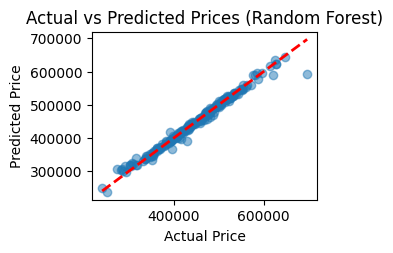

In [14]:
# 1. Actual vs Predicted Prices (Random Forest)
rf_model = models['Random Forest']
y_pred_rf = rf_model.predict(X_test_scaled)
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Random Forest)')


Text(0.5, 1.0, 'Feature Importance (Random Forest)')

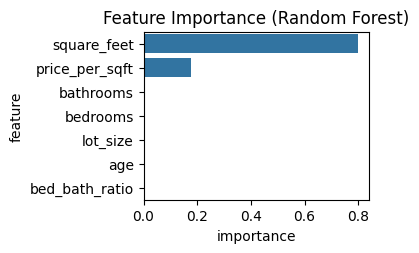

In [15]:
# 2. Feature Importance (Random Forest)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
plt.subplot(2, 2, 2)
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')



Text(0.5, 1.0, 'Distribution of House Prices')

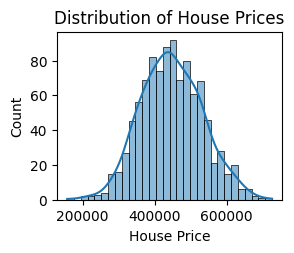

In [16]:
# 3. Price Distribution
plt.subplot(2, 2, 3)
sns.histplot(df['price'], bins=30, kde=True)
plt.xlabel('House Price')
plt.title('Distribution of House Prices')


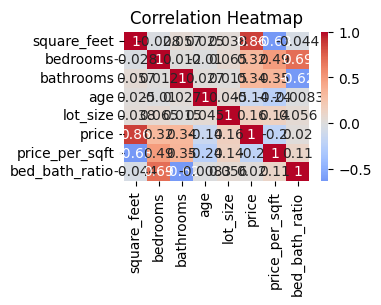

In [17]:
# 4. Correlation Heatmap
plt.subplot(2, 2, 4)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()


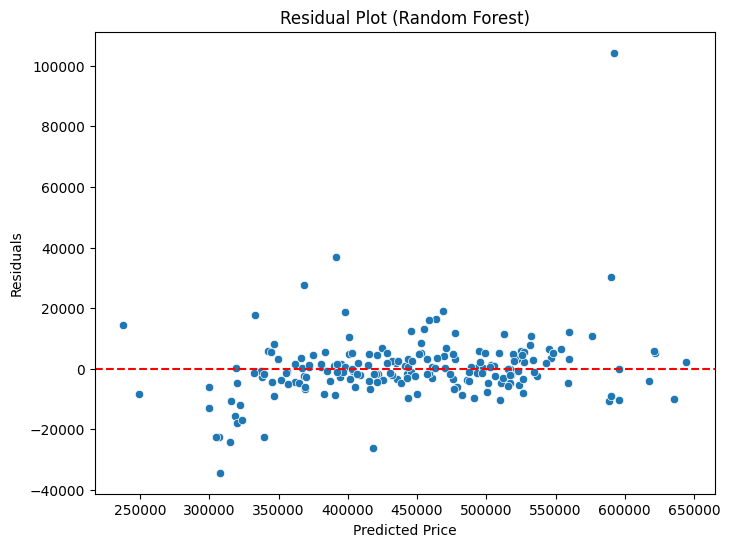

In [18]:
# 5. Residual Plot
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred_rf
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest)')
plt.show()

In [19]:

# Print feature correlations with price
print("\nFeature Correlations with Price:")
print(df.corr()['price'].sort_values(ascending=False))


Feature Correlations with Price:
price             1.000000
square_feet       0.863641
bathrooms         0.337415
bedrooms          0.321936
lot_size          0.163698
bed_bath_ratio    0.019698
age              -0.142413
price_per_sqft   -0.203966
Name: price, dtype: float64
